In [105]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [106]:
# default configs for pycharm and plt
plt.rcdefaults()
plt.style.use('default')

# Euclidean Distance

In [107]:
# Let's load dataset
iris = load_iris() #  iris dataset -> https://www.kaggle.com/datasets/uciml/iris/data nice plants btw
X = iris.data[:, :2]
y = iris.target

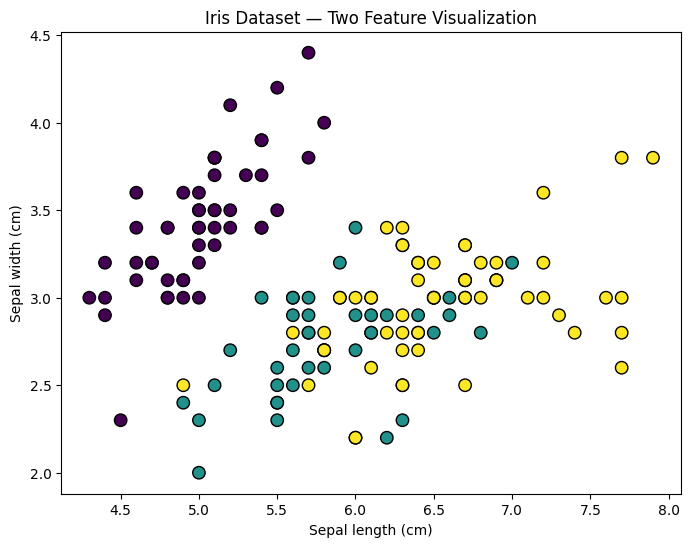

In [108]:
# And plot it!
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris Dataset — Two Feature Visualization")
plt.show()

In [109]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [110]:
# Predict and evaluate
y_pred = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred)
print(f"Accuracy (Euclidean, k=5): {acc_euclidean:.3f}")

Accuracy (Euclidean, k=5): 0.778


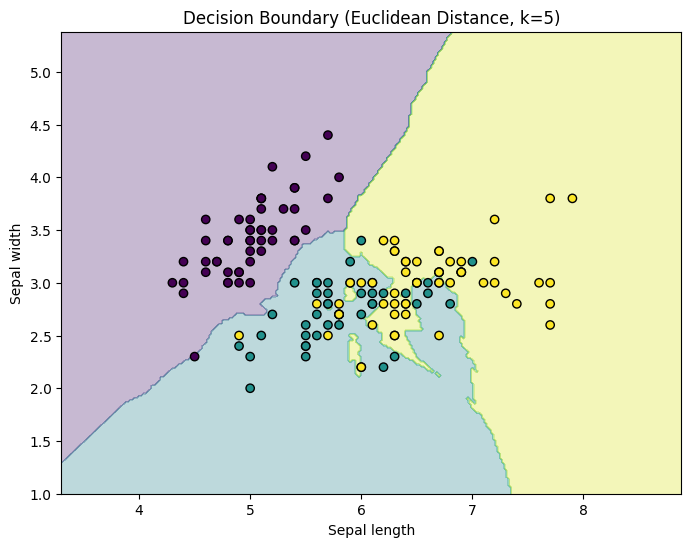

In [111]:
# Decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Decision Boundary (Euclidean Distance, k=5)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

# Manhattan Distance

In [112]:
# Generate a dataset
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2,
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=42
)
X = np.round(X, 1)

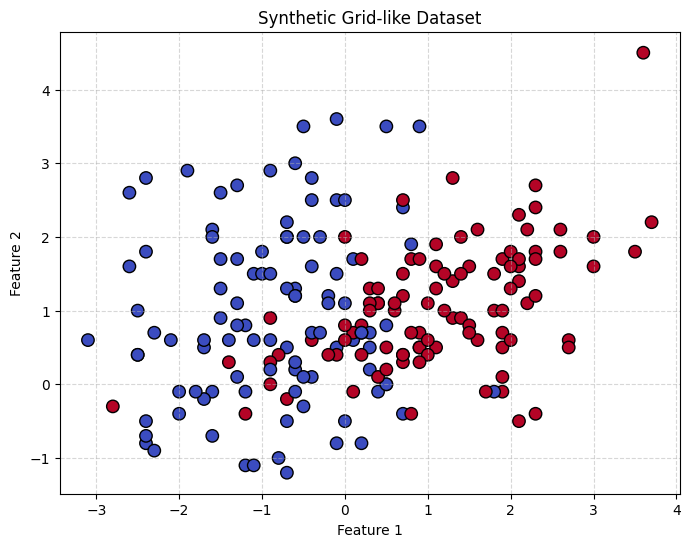

In [113]:
# Ofc plotting it
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=80)
plt.title("Synthetic Grid-like Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [114]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
# Train KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan') # -> now we use a manhattan and same neighborhood 
knn_manhattan.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [116]:
# Evaluation
y_pred = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred)
print(f"Accuracy (Manhattan, k=5): {acc_manhattan:.3f}")

Accuracy (Manhattan, k=5): 0.833


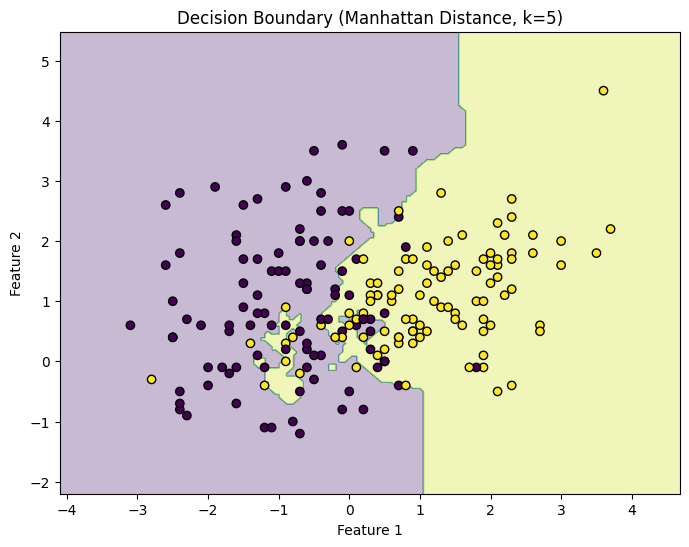

In [117]:
# Decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Decision Boundary (Manhattan Distance, k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Compare Euclidean vs Manhattan

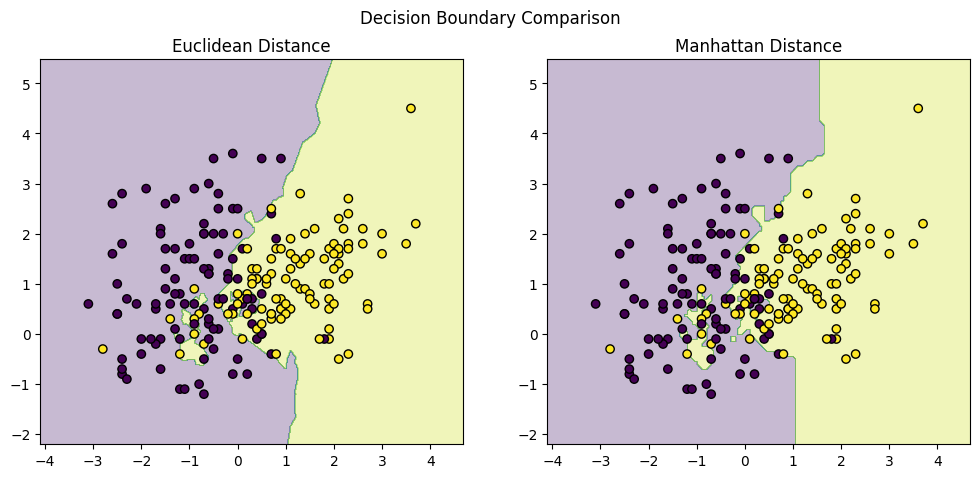

In [118]:
# Compare Euclidean vs Manhattan on same grid dataset
knn_euclidean_grid = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean_grid.fit(X_train, y_train)

Z_eu = knn_euclidean_grid.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_man = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_eu, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Euclidean Distance")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_man, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Manhattan Distance")

plt.suptitle("Decision Boundary Comparison")
plt.show()

# Experimenting with K neighborhood

## Observe accuracy changes on k=1 Euclidean and Manhattan

Accuracy (Euclidean): 71.11%
Accuracy (Manhattan): 71.11%


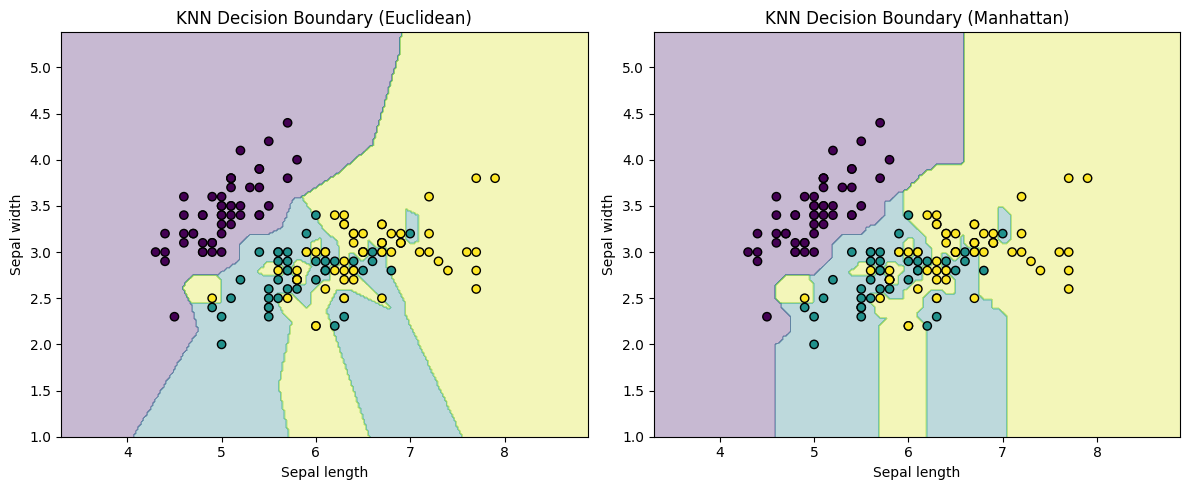

In [119]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN models
knn_euclidean = KNeighborsClassifier(n_neighbors=1, metric='euclidean').fit(X_train, y_train)
knn_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan').fit(X_train, y_train)

# Evaluate
print(f"Accuracy (Euclidean): {accuracy_score(y_test, knn_euclidean.predict(X_test)):.2%}")
print(f"Accuracy (Manhattan): {accuracy_score(y_test, knn_manhattan.predict(X_test)):.2%}")

# Create grid for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for both metrics
Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot both side-by-side
plt.figure(figsize=(12, 5))

# Euclidean
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_euclidean, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Euclidean)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Manhattan
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manhattan, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Manhattan)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()

## Observe accuracy changes on k=3 Euclidean and Manhattan

Accuracy (Euclidean): 75.56%
Accuracy (Manhattan): 75.56%


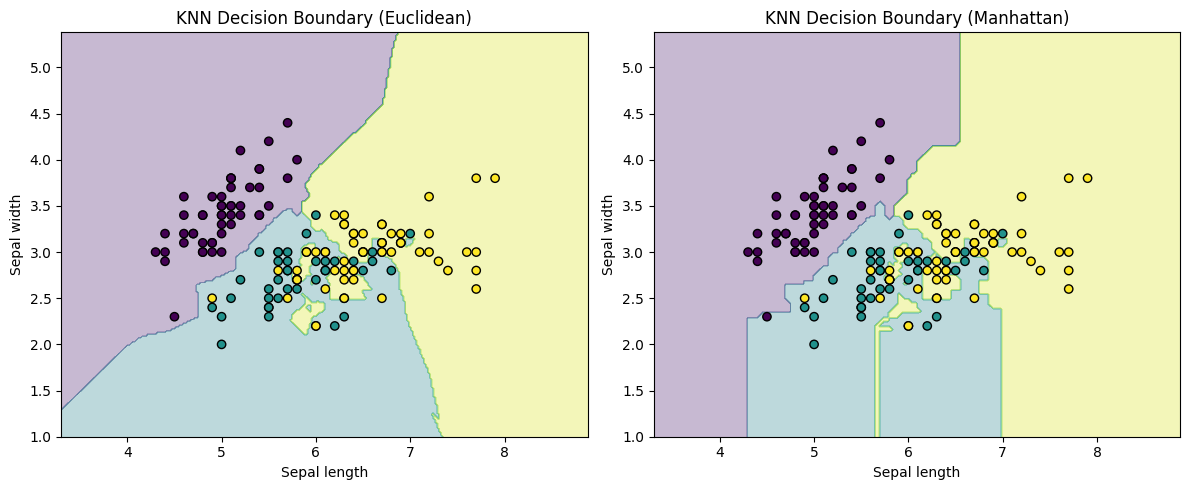

In [120]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN models
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X_train, y_train)
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan').fit(X_train, y_train)

# Evaluate
print(f"Accuracy (Euclidean): {accuracy_score(y_test, knn_euclidean.predict(X_test)):.2%}")
print(f"Accuracy (Manhattan): {accuracy_score(y_test, knn_manhattan.predict(X_test)):.2%}")

# Create grid for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for both metrics
Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot both side-by-side
plt.figure(figsize=(12, 5))

# Euclidean
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_euclidean, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Euclidean)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Manhattan
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manhattan, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Manhattan)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()

## Observe accuracy changes on k=5 Euclidean and Manhattan

Accuracy (Euclidean): 77.78%
Accuracy (Manhattan): 80.00%


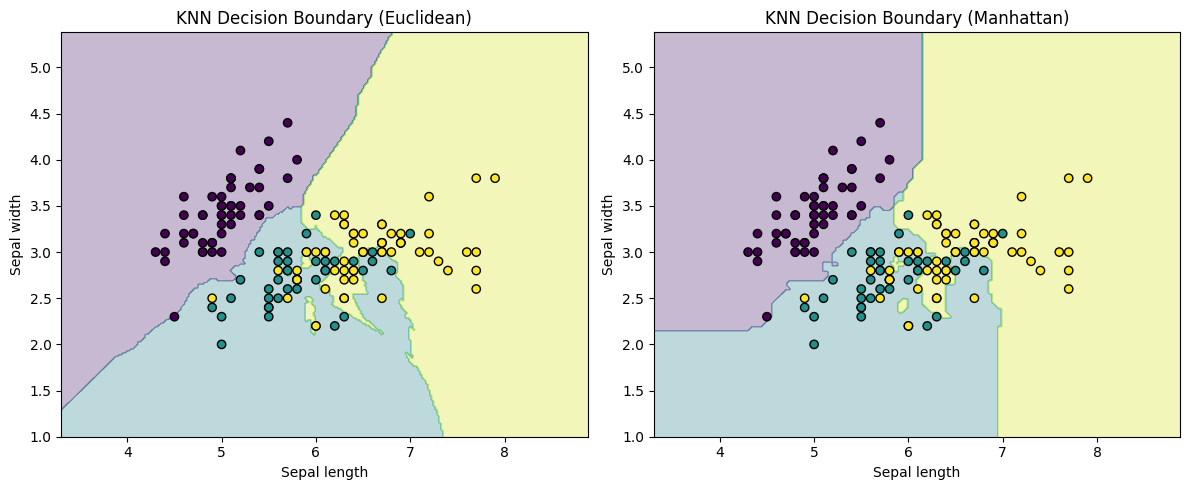

In [121]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN models
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train, y_train)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan').fit(X_train, y_train)

# Evaluate
print(f"Accuracy (Euclidean): {accuracy_score(y_test, knn_euclidean.predict(X_test)):.2%}")
print(f"Accuracy (Manhattan): {accuracy_score(y_test, knn_manhattan.predict(X_test)):.2%}")

# Create grid for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for both metrics
Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot both side-by-side
plt.figure(figsize=(12, 5))

# Euclidean
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_euclidean, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Euclidean)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Manhattan
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manhattan, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Manhattan)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()

## Observe accuracy changes on k=7 Euclidean and Manhattan

Accuracy (Euclidean): 80.00%
Accuracy (Manhattan): 77.78%


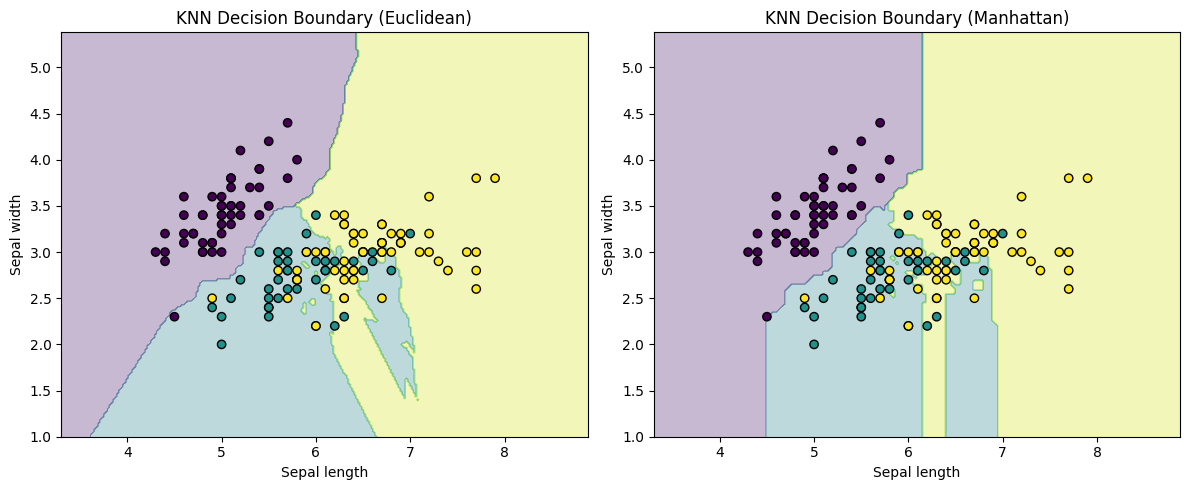

In [122]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN models
knn_euclidean = KNeighborsClassifier(n_neighbors=7, metric='euclidean').fit(X_train, y_train)
knn_manhattan = KNeighborsClassifier(n_neighbors=7, metric='manhattan').fit(X_train, y_train)

# Evaluate
print(f"Accuracy (Euclidean): {accuracy_score(y_test, knn_euclidean.predict(X_test)):.2%}")
print(f"Accuracy (Manhattan): {accuracy_score(y_test, knn_manhattan.predict(X_test)):.2%}")

# Create grid for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for both metrics
Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot both side-by-side
plt.figure(figsize=(12, 5))

# Euclidean
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_euclidean, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Euclidean)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Manhattan
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manhattan, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Manhattan)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()

## Observe accuracy changes on k=15 Euclidean and Manhattan

Accuracy (Euclidean): 77.78%
Accuracy (Manhattan): 77.78%


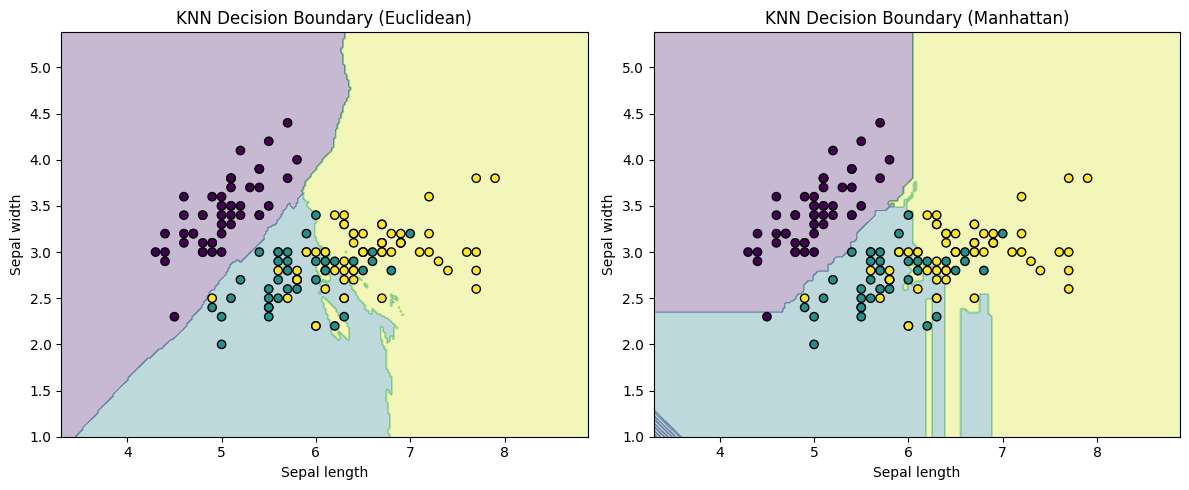

In [123]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN models
knn_euclidean = KNeighborsClassifier(n_neighbors=15, metric='euclidean').fit(X_train, y_train)
knn_manhattan = KNeighborsClassifier(n_neighbors=15, metric='manhattan').fit(X_train, y_train)

# Evaluate
print(f"Accuracy (Euclidean): {accuracy_score(y_test, knn_euclidean.predict(X_test)):.2%}")
print(f"Accuracy (Manhattan): {accuracy_score(y_test, knn_manhattan.predict(X_test)):.2%}")

# Create grid for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for both metrics
Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot both side-by-side
plt.figure(figsize=(12, 5))

# Euclidean
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_euclidean, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Euclidean)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Manhattan
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manhattan, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary (Manhattan)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()